In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import xarray as xr
import xcorr

In [3]:
plt.rcParams.update({'font.size': 9})

In [4]:
root = '../datasets'
chan = 'BHZ'

In [5]:
snr_ct = xr.open_dataset(f'{root}/snr_ct__IM.H03S[1-3]..EDH-IU.RAR.10.BH[RZ]__2014121__2020366.nc')
snr_ct['doy'] = snr_ct.time.dt.dayofyear
snr_ct['y'] = snr_ct.time.dt.year

plane_wave = xr.open_dataset(f'{root}/beamform__IM.H03S[1-3]..EDH-IU.RAR.10.{chan}__2014121__2020366.nc')
plane_wave['doy'] = plane_wave.time.dt.dayofyear
plane_wave['y'] = plane_wave.time.dt.year

In [6]:
active = snr_ct.ct >= 0
inactive = ~active

<IPython.core.display.Javascript object>


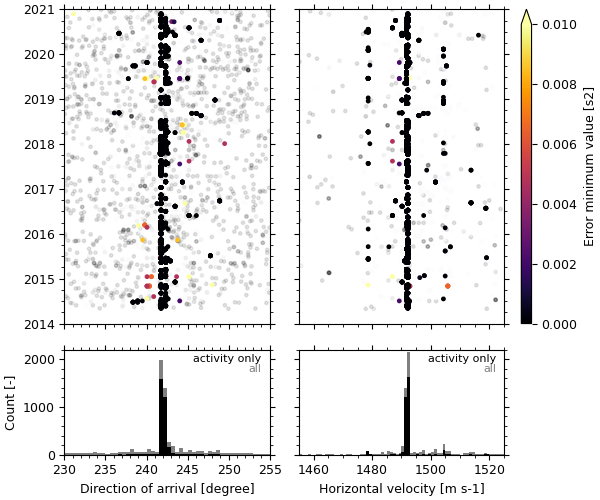

In [7]:
fig = plt.figure(constrained_layout=True, figsize=(6, 5))

gs = GridSpec(2, 3, figure=fig, height_ratios=(3, 1), width_ratios=(20, 20, 1))
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax5 = fig.add_subplot(gs[1, 1], sharex=ax2, sharey=ax4)

pltargs = dict(y='time', hue='err', s=6, add_guide=False, vmin=0, vmax=.01)

# limits
vel_min, vel_max = 1455, 1525
doa_min, doa_max = 230, 255
vel_sel = (plane_wave.vel > vel_min) & (plane_wave.vel < vel_max)
doa_sel = (plane_wave.doa > doa_min) & (plane_wave.doa < doa_max)

plane_wave.where(inactive & doa_sel).plot.scatter(x='doa', ax=ax1, alpha=.1, cmap='binary', **pltargs)
s1 = plane_wave.where(active).sortby('err', ascending=False).plot.scatter(x='doa', ax=ax1, cmap='inferno', **pltargs)
ax1.tick_params(labelbottom=False, labelleft=True)
ax1.set_xlabel(None)
ax1.set_xlim(doa_min, doa_max)
ax1.set_ylim(np.datetime64('2014-01-01'), np.datetime64('2021-01-01'))
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_ticks_position('both')
ax1.set_ylabel(None)
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_ticks_position('both')

s2 = plane_wave.where(inactive & vel_sel).plot.scatter(x='vel', ax=ax2, alpha=.1, cmap='binary', **pltargs)
s2 = plane_wave.where(active).sortby('err', ascending=False).plot.scatter(x='vel', ax=ax2, cmap='inferno', **pltargs)
ax2.tick_params(labelbottom=False, labelleft=False)
ax2.set_xlabel(None)
ax2.set_xlim(vel_min, vel_max)
ax2.set_ylim(np.datetime64('2014-01-01'), np.datetime64('2021-01-01'))
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_ticks_position('both')
ax2.set_ylabel(None)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_ticks_position('both')

cb = plt.colorbar(s2, cax=ax3, use_gridspec=True, extend='max')
cb.set_label(f'{plane_wave.err.long_name} [{plane_wave.err.units}]')

plane_wave.doa.plot.hist(ax=ax4, bins=np.arange(0, 360, .5), color='gray')
plane_wave.doa.where(active).plot.hist(ax=ax4, bins=np.arange(0, 360, .5), color='k')
ax4.set_title(None)
ax4.set_xlim(doa_min, doa_max)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.xaxis.set_ticks_position('both')
ax4.set_ylabel('Count [-]')
ax4.set_ylim(0, 2200)
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_ticks_position('both')
ax4.text(0.96, 0.96, 'activity only', transform=ax4.transAxes, ha='right', va='top',
         fontdict=dict(fontsize=8, color='k'))
ax4.text(0.96, 0.86, 'all', transform=ax4.transAxes, ha='right', va='top',
         fontdict=dict(fontsize=8, color='gray'))

plane_wave.vel.plot.hist(ax=ax5, bins=np.arange(1400, 1600, 1), color='gray')
plane_wave.vel.where(active).plot.hist(ax=ax5, bins=np.arange(1400, 1600, 1), color='k')
ax5.tick_params(labelbottom=True, labelleft=False)
ax5.set_title(None)
ax5.set_xlim(vel_min, vel_max)
ax5.xaxis.set_minor_locator(AutoMinorLocator())
ax5.xaxis.set_ticks_position('both')
ax5.set_ylabel(None)
ax5.set_ylim(0, 2200)
ax5.yaxis.set_minor_locator(AutoMinorLocator())
ax5.yaxis.set_ticks_position('both')
ax5.text(0.96, 0.96, 'activity only', transform=ax5.transAxes, ha='right', va='top',
         fontdict=dict(fontsize=8, color='k'))
ax5.text(0.96, 0.86, 'all', transform=ax5.transAxes, ha='right', va='top',
         fontdict=dict(fontsize=8, color='gray'))

plt.show()
plt.savefig(f'figs/H03S_beamform_{chan}.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


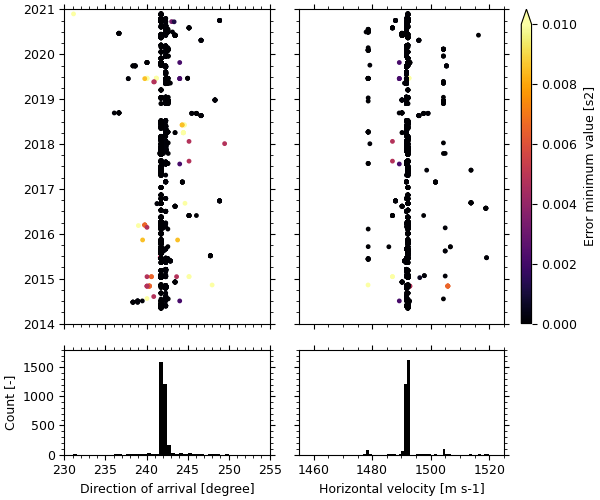

In [8]:
fig = plt.figure(constrained_layout=True, figsize=(6, 5))

gs = GridSpec(2, 3, figure=fig, height_ratios=(3, 1), width_ratios=(20, 20, 1))
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax5 = fig.add_subplot(gs[1, 1], sharex=ax2, sharey=ax4)

pltargs = dict(y='time', hue='err', cmap='inferno', s=6,
               add_guide=False, vmin=0, vmax=.01)

# limits
vel_min, vel_max = 1455, 1525
doa_min, doa_max = 230, 255

s1 = plane_wave.where(snr_ct.ct >= 0).sortby('err', ascending=False).plot.scatter(x='doa', ax=ax1, **pltargs)
ax1.tick_params(labelbottom=False, labelleft=True)
ax1.set_xlabel(None)
ax1.set_xlim(doa_min, doa_max)
ax1.set_ylim(np.datetime64('2014-01-01'), np.datetime64('2021-01-01'))
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_ticks_position('both')
ax1.set_ylabel(None)
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_ticks_position('both')

s2 = plane_wave.where(snr_ct.ct >= 0).sortby('err', ascending=False).plot.scatter(x='vel', ax=ax2, **pltargs)
ax2.tick_params(labelbottom=False, labelleft=False)
ax2.set_xlabel(None)
ax2.set_xlim(vel_min, vel_max)
ax2.set_ylim(np.datetime64('2014-01-01'), np.datetime64('2021-01-01'))
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_ticks_position('both')
ax2.set_ylabel(None)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_ticks_position('both')

cb = plt.colorbar(s2, cax=ax3, use_gridspec=True, extend='max')
cb.set_label(f'{plane_wave.err.long_name} [{plane_wave.err.units}]')

plane_wave.where(snr_ct.ct >= 0).doa.plot.hist(ax=ax4, bins=np.arange(0, 360, .5), color='k')
ax4.set_title(None)
ax4.set_xlim(doa_min, doa_max)
ax4.xaxis.set_minor_locator(AutoMinorLocator())
ax4.xaxis.set_ticks_position('both')
ax4.set_ylabel('Count [-]')
ax4.set_ylim(0, 1800)
ax4.yaxis.set_minor_locator(AutoMinorLocator())
ax4.yaxis.set_ticks_position('both')

plane_wave.where(snr_ct.ct >= 0).vel.plot.hist(ax=ax5, bins=np.arange(1400, 1600, 1), color='k')
ax5.tick_params(labelbottom=True, labelleft=False)
ax5.set_title(None)
ax5.set_xlim(vel_min, vel_max)
ax5.xaxis.set_minor_locator(AutoMinorLocator())
ax5.xaxis.set_ticks_position('both')
ax5.set_ylabel(None)
ax5.set_ylim(0, 1800)
ax5.yaxis.set_minor_locator(AutoMinorLocator())
ax5.yaxis.set_ticks_position('both')

# fig.suptitle("IM.H03S Plane wave estimate")

plt.show()
plt.savefig(f'figs/H03S_beamform_activity_{chan}.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


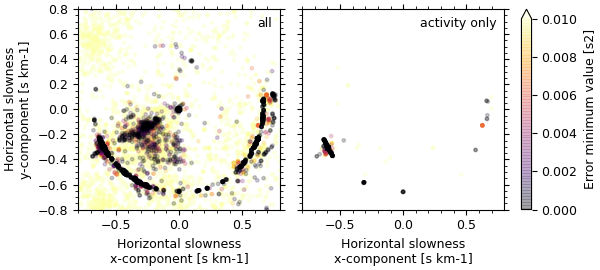

In [9]:
fig = plt.figure(constrained_layout=True, figsize=(6, 2.7))

gs = GridSpec(1, 3, figure=fig, height_ratios=(1,), width_ratios=(20, 20, 1))
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharex=ax1, sharey=ax1)
ax3 = fig.add_subplot(gs[0, 2])

pltargs = dict(x='s_x', y='s_y', hue='err', s=6, cmap='inferno',
               vmin=0, vmax=.01, add_guide=False, alpha=.2)

s1 = plane_wave.sortby('err', ascending=False).plot.scatter(**pltargs, ax=ax1)
ax1.set_xlim(-.8, .8)
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_ticks_position('both')
ax1.set_ylim(-.8, .8)
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_ticks_position('both')
ax1.text(0.96, 0.96, 'all', transform=ax1.transAxes, ha='right', va='top')

s2 = plane_wave.where(snr_ct.ct >= 0).sortby('err', ascending=False).plot.scatter(**pltargs, ax=ax2)
ax2.tick_params(labelleft=False)
ax2.set_xlim(-.8, .8)
ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_ticks_position('both')
ax2.set_ylim(-.8, .8)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_ticks_position('both')
ax2.set_ylabel(None)
ax2.text(0.96, 0.96, 'activity only', transform=ax2.transAxes, ha='right', va='top')

cb = plt.colorbar(s2, cax=ax3, use_gridspec=True, extend='max')
cb.set_label(f'{plane_wave.err.long_name} [{plane_wave.err.units}]')

plt.show()
plt.savefig(f'figs/H03S_slowness_{chan}.pdf', bbox_inches='tight')